<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [597]:
# !pip install jupyterlab
# !pip install --upgrade ydata-sdk
# !pip install ipywidgets
# !pip install --upgrade ydata-profiling
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [223]:
%matplotlib inline

In [225]:
#Importation de la librairie Pandas
import pandas as pd
from ydata_profiling import ProfileReport
import ydata_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from ipywidgets import widgets
from sklearn.decomposition import PCA
import os
os.environ["OMP_NUM_THREADS"] = "1"
import re
from sklearn.metrics import silhouette_score
import math
import matplotlib

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement du fichier Excel</h3>
</div>

In [228]:
#Importation du fichier web.xlsx
df_fichierfinal = pd.read_excel("export_df_final.xlsx")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

In [231]:
df_fichierfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      236 non-null    object 
 1   Variation_population      236 non-null    float64
 2   Disponibilité intérieure  236 non-null    int64  
 3   Exportations - Quantité   236 non-null    int64  
 4   Importations - Quantité   236 non-null    int64  
 5   Nourriture                236 non-null    int64  
 6   Production                236 non-null    int64  
 7   Aide alimentaire          236 non-null    int64  
 8   PIB                       236 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 16.7+ KB


In [233]:
df_fichierfinal.head()

Zone  Variation_population  Disponibilité intérieure  \
0     Afghanistan                  2.41                  57000000   
1  Afrique du Sud                  1.37                2118000000   
2         Albanie                 -0.05                  47000000   
3         Algérie                  2.03                 277000000   
4       Allemagne                  0.56                1739000000   

   Exportations - Quantité  Importations - Quantité  Nourriture  Production  \
0                        0                 29000000    55000000    28000000   
1                 63000000                514000000  2035000000  1667000000   
2                        0                 38000000    47000000    13000000   
3                        0                  2000000   264000000   275000000   
4                646000000                842000000  1609000000  1514000000   

   Aide alimentaire      PIB  
0                 0   2956.8  
1                 0  14823.6  
2                 0  14229.3  
3              9476  13805.4  
4                 0  61563.6

In [235]:
df_fichierfinal.describe()

Variation_population  Disponibilité intérieure  \
count            236.000000              2.360000e+02   
mean               1.174237              4.953008e+08   
std                1.202109              1.880398e+09   
min               -3.920000              0.000000e+00   
25%                0.365000              0.000000e+00   
50%                1.050000              4.100000e+07   
75%                1.947500              2.027500e+08   
max                5.410000              1.826600e+10   

       Exportations - Quantité  Importations - Quantité    Nourriture  \
count             2.360000e+02             2.360000e+02  2.360000e+02   
mean              7.561441e+07             6.449153e+07  4.732966e+08   
std               3.934684e+08             1.633427e+08  1.835791e+09   
min               0.000000e+00             0.000000e+00  0.000000e+00   
25%               0.000000e+00             0.000000e+00  0.000000e+00   
50%               0.000000e+00             5.000000e+06  4.100000e+07   
75%               4.000000e+06             4.050000e+07  1.975000e+08   
max               4.223000e+09             1.069000e+09  1.810000e+10   

         Production  Aide alimentaire            PIB  
count  2.360000e+02        236.000000     236.000000  
mean   5.162373e+08       3150.711864   19276.696186  
std    2.134244e+09      31791.332640   24737.860665  
min    0.000000e+00          0.000000       0.000000  
25%    0.000000e+00          0.000000    2119.850000  
50%    2.000000e+07          0.000000    9778.350000  
75%    1.687500e+08          0.000000   28241.075000  
max    2.191400e+10     465574.000000  135547.000000

In [237]:
df_fichierfinal.set_index('Zone',inplace=True)
df_fichierfinal

Variation_population  Disponibilité intérieure  \
Zone                                                                        
Afghanistan                                2.41                  57000000   
Afrique du Sud                             1.37                2118000000   
Albanie                                   -0.05                  47000000   
Algérie                                    2.03                 277000000   
Allemagne                                  0.56                1739000000   
...                                         ...                       ...   
Îles Salomon                               2.64                   3000000   
Îles Turques-et-Caïques                    1.48                         0   
Îles Vierges américaines                  -0.07                         0   
Îles Vierges britanniques                  0.76                         0   
Îles Wallis-et-Futuna                     -2.01                         0   

                           Exportations - Quantité  Importations - Quantité  \
Zone                                                                          
Afghanistan                                      0                 29000000   
Afrique du Sud                            63000000                514000000   
Albanie                                          0                 38000000   
Algérie                                          0                  2000000   
Allemagne                                646000000                842000000   
...                                            ...                      ...   
Îles Salomon                                     0                  6000000   
Îles Turques-et-Caïques                          0                        0   
Îles Vierges américaines                         0                        0   
Îles Vierges britanniques                        0                        0   
Îles Wallis-et-Futuna                            0                        0   

                           Nourriture  Production  Aide alimentaire      PIB  
Zone                                                                          
Afghanistan                  55000000    28000000                 0   2956.8  
Afrique du Sud             2035000000  1667000000                 0  14823.6  
Albanie                      47000000    13000000                 0  14229.3  
Algérie                     264000000   275000000              9476  13805.4  
Allemagne                  1609000000  1514000000                 0  61563.6  
...                               ...         ...               ...      ...  
Îles Salomon                  3000000           0                 0   2896.7  
Îles Turques-et-Caïques             0           0                 0      0.0  
Îles Vierges américaines            0           0                 0      0.0  
Îles Vierges britanniques           0           0                 0      0.0  
Îles Wallis-et-Futuna               0           0                 0      0.0  

[236 rows x 8 columns]

In [239]:
Profile=ProfileReport(df_fichierfinal, title="Rapport de profil sur df_fichierfinal")

In [240]:
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Analyse univariée - Les distribution</h3>
</div>

+ Pour la majorite des pays la population variés entre 0 et 3, elle suit pas une distribution normale, nous avons une moyenne de 1,1742373 avec un Minimum -3,92 et un Maximum 5,41 contre 28 valeur négatives qui représente 11,9% dans la variation de la population.
+ Pour la majorite des pays (210) nous avons une aide alimentaire quasi nulle qui represente 89% avec une moyenne de 3150,71 pour le reste des pays soit un maximun de 465574 et ne suit pas une distribution normale.
+ Pour la disponibilité interieure plus de la moitie des pays ont une disponibilté interieure et elles ne suivent pas une distribution normale avec une moyenne de 495 300 850 et un maximun de 18 266 000 000 seule une minorité de 28% qui n'ont pas de disponibilité interieure.
+ Pour les exportations plus de la moitie des pays ont une quantite d'exportation nulle et elles ne suivent pas une distribution normale avec une moyenne de 75 614 407 et un maximun de  4 223 000 000 seule une majorité de 64% qui ont une exportation nulle.
+ Pour les importations nous avons qu'une minorité des pays font des importations et elles ne suivent pas une distribution normale avec une moyenne de 63 391 525 et un maximun de 1 069 000 000.
+ Pour les nourritures (aliment de volaille) nous avons qu'une minorité des pays soit 28% qui n'ont pas de nourriture avec une moyenne de 473 296 610 de disponibilité de nouriiture pour le reste des pays et elles ne suivent pas une distribution normale.
+ Pour la production  nous avons qu'une minorité des pays soit 28% qui n'ont pas de nourriture avec une moyenne de 473 296 610 de disponibilité de nouriiture pour le reste des pays et elles ne suivent pas une distribution normale.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Analyse bivariée - Les analyses de corrélation</h3>
</div>

+ Nous avons une forte corrélation entre la Disponibilité intérieure avec les Exportations - Quantité, Importations - Quantité, Nourriture, Production.
+ Nous avons une forte corrélation entre la Exportations - Quantité avec les Disponibilité intérieure, Importations - Quantité, Nourriture, PIB, Production.
+ Nous avons une forte corrélation entre Importations - Quantité avec les Disponibilité intérieure, Exportations - Quantité, Nourriture, Production.
+ Nous avons une forte corrélation entre Nourriture avec les Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Production.
+ Nous avons une forte corrélation entre PIB avec les Exportations - Quantité.
+ Nous avons une forte corrélation entre Production avec les Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture.ture.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Normalisation des données avec le standard scaler  </h2>
</div>

In [247]:
# Initialiser le StandardScaler
scaler = StandardScaler()
# Sélectionner uniquement les colonnes numériques à normaliser
colonnes_numeriques = df_fichierfinal.select_dtypes(include=['number']).columns
scalere1 = scaler.fit_transform(df_fichierfinal)
# Appliquer la normalisation
df_scaler1=pd.DataFrame(scalere1,index=df_fichierfinal.index, columns=colonnes_numeriques)
# Afficher les premières lignes du DataFrame normalisé
df_scaler1.head()

Variation_population  Disponibilité intérieure  \
Zone                                                             
Afghanistan                 1.030181                 -0.233585   
Afrique du Sud              0.163196                  0.864789   
Albanie                    -1.020573                 -0.238914   
Algérie                     0.713398                 -0.116340   
Allemagne                  -0.512053                  0.662808   

                Exportations - Quantité  Importations - Quantité  Nourriture  \
Zone                                                                           
Afghanistan                   -0.192582                -0.217744   -0.228341   
Afrique du Sud                -0.032128                 2.757784    0.852506   
Albanie                       -0.192582                -0.162528   -0.232708   
Algérie                       -0.192582                -0.383392   -0.114251   
Allemagne                      1.452716                 4.770100    0.619960   

                Production  Aide alimentaire       PIB  
Zone                                                    
Afghanistan      -0.229250         -0.099317 -0.661115  
Afrique du Sud    0.540336         -0.099317 -0.180394  
Albanie          -0.236293         -0.099317 -0.204469  
Algérie          -0.113272          0.199386 -0.221641  
Allemagne         0.468495         -0.099317  1.713033

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Identification du nombre optimal de clusters par la méthode du coude  </h2>
</div>

In [249]:
# Garder uniquement les colonnes numériques
df_numeric = df_fichierfinal.select_dtypes(include=[np.number])
# Calcul de l'inertie pour différentes valeurs de k
inerties = []
K_range = range(1, 11)  # De 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaler1)  # df_scaler1 doit être la version normalisée de df_numeric
    inerties.append(kmeans.inertia_)

C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Pyth

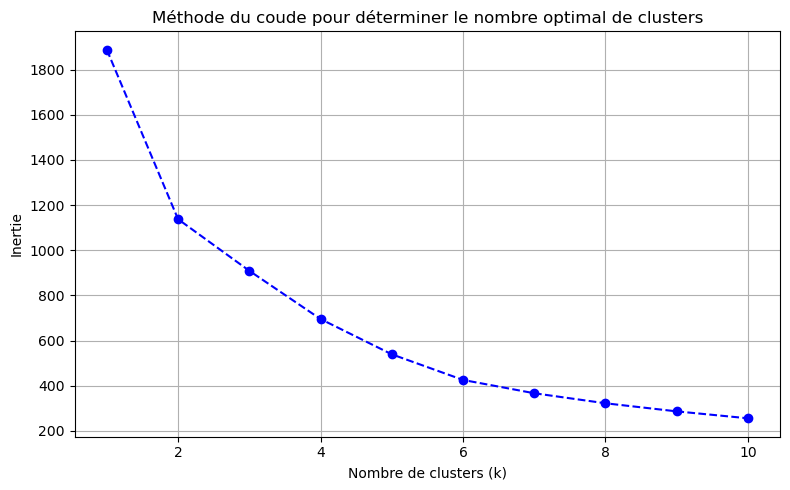

In [250]:
# Tracé de la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inerties, marker='o', linestyle='--', color='blue')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Identification du nombre optimal de clusters par la méthode de silhouette</h2>
</div>

Pour k = 2, le score silhouette est : 0.855
Pour k = 3, le score silhouette est : 0.415
Pour k = 4, le score silhouette est : 0.427
Pour k = 5, le score silhouette est : 0.405
Pour k = 6, le score silhouette est : 0.402
Pour k = 7, le score silhouette est : 0.345
Pour k = 8, le score silhouette est : 0.327
Pour k = 9, le score silhouette est : 0.325
Pour k = 10, le score silhouette est : 0.318


C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Pyth

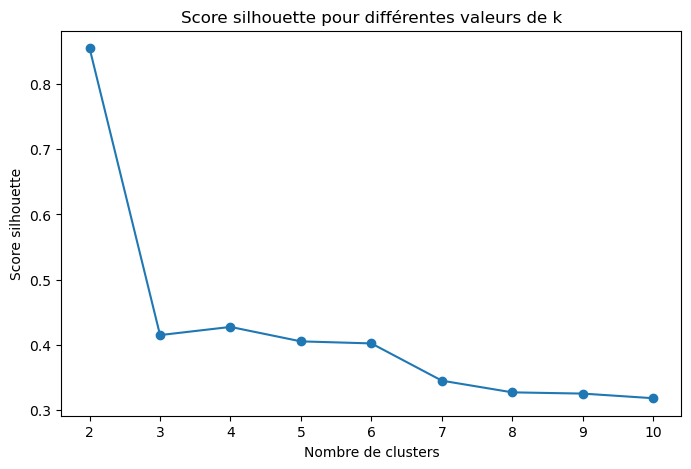

In [252]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaler1)
    score = silhouette_score(df_scaler1, labels)
    silhouette_scores.append(score)
    print(f"Pour k = {k}, le score silhouette est : {score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score silhouette")
plt.title("Score silhouette pour différentes valeurs de k")
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Application du kmeans avec le nombre de clusters</h2>
</div>

In [254]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
km_cluster = kmeans.fit_predict(df_scaler1)
df_fichierfinal["cluster"] = km_cluster
print("Le nombre de cluster avec KMeans est :")
print(df_fichierfinal["cluster"].value_counts())
df_fichierfinal.head()

Le nombre de cluster avec KMeans est :
cluster
1    233
0      3
Name: count, dtype: int64


C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Variation_population  Disponibilité intérieure  \
Zone                                                             
Afghanistan                     2.41                  57000000   
Afrique du Sud                  1.37                2118000000   
Albanie                        -0.05                  47000000   
Algérie                         2.03                 277000000   
Allemagne                       0.56                1739000000   

                Exportations - Quantité  Importations - Quantité  Nourriture  \
Zone                                                                           
Afghanistan                           0                 29000000    55000000   
Afrique du Sud                 63000000                514000000  2035000000   
Albanie                               0                 38000000    47000000   
Algérie                               0                  2000000   264000000   
Allemagne                     646000000                842000000  1609000000   

                Production  Aide alimentaire      PIB  cluster  
Zone                                                            
Afghanistan       28000000                 0   2956.8        1  
Afrique du Sud  1667000000                 0  14823.6        1  
Albanie           13000000                 0  14229.3        1  
Algérie          275000000              9476  13805.4        1  
Allemagne       1514000000                 0  61563.6        1

Les outliers à commenter

In [256]:
df_fichierfinal[df_fichierfinal["cluster"] ==0]

Variation_population  Disponibilité intérieure  \
Zone                                                                    
Brésil                                 0.79                9982000000   
Chine, continentale                    0.47               18161000000   
États-Unis d'Amérique                  0.62               18266000000   

                       Exportations - Quantité  Importations - Quantité  \
Zone                                                                      
Brésil                              4223000000                  3000000   
Chine, continentale                  576000000                452000000   
États-Unis d'Amérique               3692000000                123000000   

                        Nourriture   Production  Aide alimentaire      PIB  \
Zone                                                                         
Brésil                  9982000000  14201000000                 0  17145.3   
Chine, continentale    17518000000  18236000000                 0  16461.1   
États-Unis d'Amérique  18100000000  21914000000                 0  66105.7   

                       cluster  
Zone                            
Brésil                       0  
Chine, continentale          0  
États-Unis d'Amérique        0

+ Le premier clustering est un peu biaisé par ces pays qui constituent des outliers.
  Ils ont une plus grande disponibilité intérieure et un PIB plus élevé.
  Grâce à leur production, ils sont en mesure de faire des exportations en quantité sur les excédents, et ils ne bénéficient pas non plus d'aide alimentaire. 
Ils peuvent aussi faire des importations en raison de la forte  variation de leur population

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 8 - Identification du nombre optimal de KMEANS  sans les pays outliers  </h2>
</div>

In [259]:
df_fichierfinal=df_fichierfinal[~df_fichierfinal.index.isin(["Brésil", "Chine, continentale", "États-Unis d'Amérique", "Yémen"])].drop("cluster", axis=1)

+ Nous avons exclu le Yémen en raison du fait qu'il n'a pas de PIB, avec une exportation nulle et une faible variation de la population.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 9 - Normalisation des données avec le standard scaler sans les outliers  </h2>
</div>

In [262]:
# Étape 1 : Sélection des colonnes numériques à standardiser
colonnes_numeriques = df_fichierfinal.select_dtypes(include='number').columns

# Étape 2 : Application du standard scaler
scaler = StandardScaler()
scalere1 = scaler.fit_transform(df_fichierfinal[colonnes_numeriques])

# Étape 3 : Création d’un nouveau DataFrame avec les données standardisées
df_scaler_2 = pd.DataFrame(scalere1, index=df_fichierfinal.index, columns=colonnes_numeriques)

# Affichage
print("Ci-dessous, nous avons les données standardisées :")
df_scaler_2.head()

Ci-dessous, nous avons les données standardisées :


Variation_population  Disponibilité intérieure  \
Zone                                                             
Afghanistan                 1.023560                 -0.366331   
Afrique du Sud              0.160862                  2.706040   
Albanie                    -1.017053                 -0.381238   
Algérie                     0.708343                 -0.038373   
Allemagne                  -0.511047                  2.141058   

                Exportations - Quantité  Importations - Quantité  Nourriture  \
Zone                                                                           
Afghanistan                   -0.260494                -0.208098   -0.363540   
Afrique du Sud                 0.146538                 2.780053    2.781328   
Albanie                       -0.260494                -0.152647   -0.376246   
Algérie                       -0.260494                -0.374448   -0.031581   
Allemagne                      3.913202                 4.800905    2.104705   

                Production  Aide alimentaire       PIB  
Zone                                                    
Afghanistan      -0.400655         -0.120971 -0.657498  
Afrique du Sud    2.104372         -0.120971 -0.176535  
Albanie          -0.423581         -0.120971 -0.200622  
Algérie          -0.023143          0.835694 -0.217803  
Allemagne         1.870529         -0.120971  1.717842

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 10 - Identification du nombre optimal de clusters par la méthode du coude sans les outliers  </h2>
</div>

C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Pyth

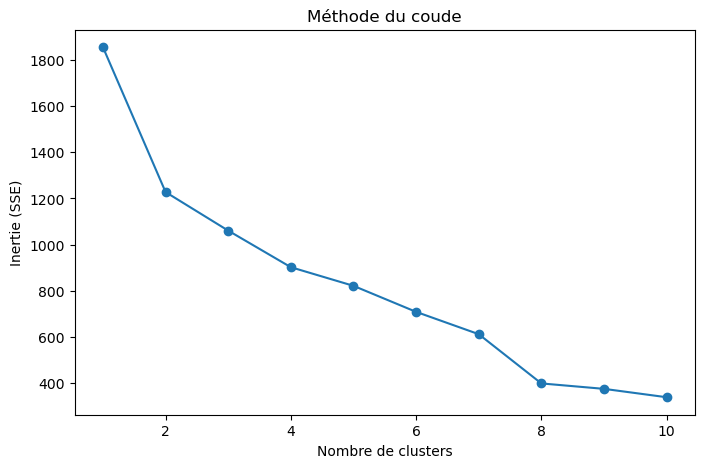

In [264]:
k_range = range(1, 11)
inertie = [KMeans(n_clusters=k, random_state=42).fit(df_scaler_2).inertia_ for k in k_range]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(k_range), inertie, marker='o')
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Inertie (SSE)")
ax.set_title("Méthode du coude")
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 10 - Identification du nombre optimal de clusters par la méthode de silhouette sans les outliers  </h2>
</div>

In [266]:

# Tester plusieurs valeurs de k
silhouette_scores = []
K_range = range(2, 11)  # On commence à 2 clusters car silhouette_score n'est pas défini pour k=1
for k in K_range:
    kmeans2 = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels1 = kmeans2.fit_predict(df_scaler_2)  # Prédiction des clusters
    score1 = silhouette_score(df_scaler_2, labels1)  # Calcul du score silhouette
    silhouette_scores.append(score1)
    print(f"Pour k = {k}, le score silhoutte est : {score1:.3f}")

Pour k = 2, le score silhoutte est : 0.591
Pour k = 3, le score silhoutte est : 0.371
Pour k = 4, le score silhoutte est : 0.382
Pour k = 5, le score silhoutte est : 0.390
Pour k = 6, le score silhoutte est : 0.348
Pour k = 7, le score silhoutte est : 0.361
Pour k = 8, le score silhoutte est : 0.379
Pour k = 9, le score silhoutte est : 0.377
Pour k = 10, le score silhoutte est : 0.370


C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Pyth

C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Pyth

Pour k = 2, le score silhouette est : 0.591
Pour k = 3, le score silhouette est : 0.371
Pour k = 4, le score silhouette est : 0.382
Pour k = 5, le score silhouette est : 0.390
Pour k = 6, le score silhouette est : 0.348
Pour k = 7, le score silhouette est : 0.361
Pour k = 8, le score silhouette est : 0.379
Pour k = 9, le score silhouette est : 0.377
Pour k = 10, le score silhouette est : 0.370


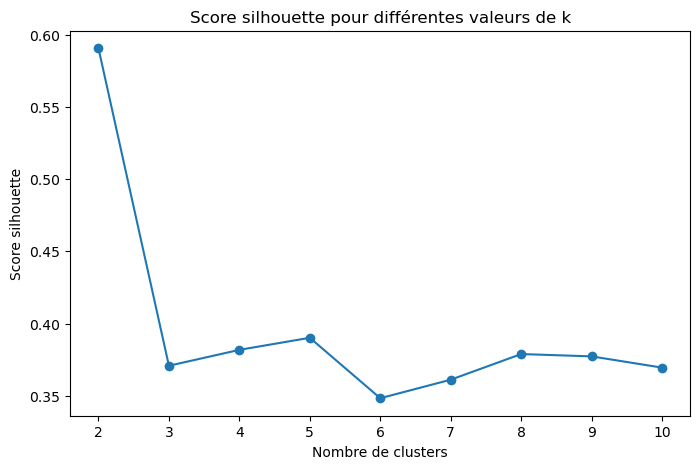

In [267]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaler_2)
    score = silhouette_score(df_scaler_2, labels)
    silhouette_scores.append(score)
    print(f"Pour k = {k}, le score silhouette est : {score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score silhouette")
plt.title("Score silhouette pour différentes valeurs de k")
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 11 - Application du kmeans avec le nombre de clusters sans les pays outliers</h2>
</div>

In [269]:
# Définir le nombre optimal de clusters
optimal_k = 2

# Appliquer le modèle KMeans
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(df_scaler_2)

# Ajouter les étiquettes au DataFrame avec un nom de colonne explicite
df_fichierfinal["Cluster_KM"] = cluster_labels

# Afficher les résultats avec renommage clair
print("Le nombre de cluster avec KMeans est :")
print("Cluster_KM")
print(df_fichierfinal["Cluster_KM"].value_counts())

Le nombre de cluster avec KMeans est :
Cluster_KM
Cluster_KM
1    201
0     31
Name: count, dtype: int64


C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 12 -Caractérisation des clusters avec une analyse bivariée entre les variables et les clusters (boxplot)</h2>
</div>

+ Ci dessous le boxplot sur l'ensemble des valeurs avec le subplots

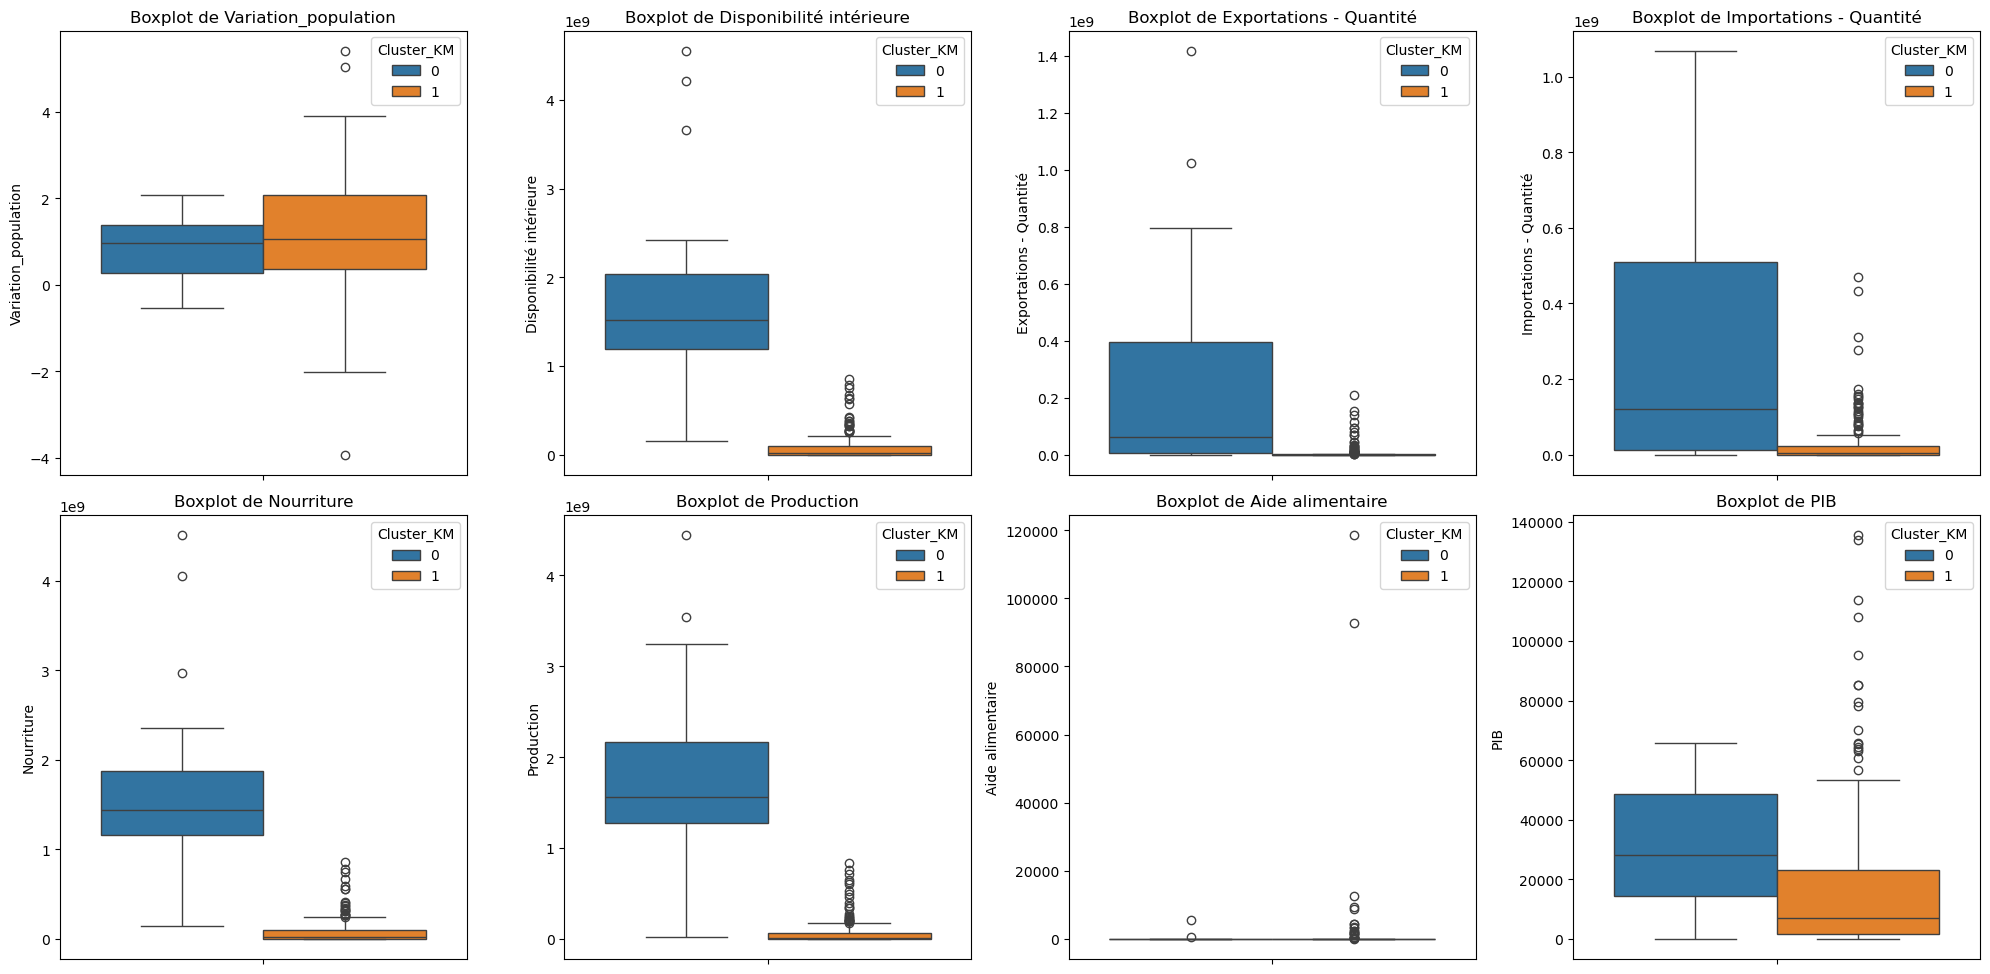

In [275]:
# Nombre de colonnes numériques
n_cols = len(colonnes_numeriques)

# Grille dynamique : 4 colonnes par ligne
ncols = 4
nrows = math.ceil(n_cols / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(colonnes_numeriques):
    sns.boxplot(data=df_fichierfinal, y=col, hue="Cluster_KM", ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].legend(title='Cluster_KM')

# Supprimer les axes vides restants
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analyses des boxplots : 
+ Disponibilité intérieure : Nous remarquons une forte disponibilité intérieure des pays du cluster 0 par rapport au pays du cluster 1.
+ Exportation - Quantité : Nous remarquons que les pays du cluster 0 ont une forte exportation par rapport aux pays du cluster 1.
+ Importations - Quantité : Nous voyons que les pays du cluster 0 font une forte importation par rapport aux pays du cluster 1.
+ Nourriture : Nous voyons que les pays du cluster 0 ont plus de nourriture grâce à leur production par rapport aux pays du cluster 1.
+ Production : Nous remarquons que les pays du cluster 0 ont une forte production par rapport aux pays du cluster 1.
+ Aide alimentaire : Aucune donnée interprétable n'est disponible concernant le groupe. En se basant sur les valeurs du tableau, il est évident que les pays du cluster 1 reçoivent une aide supérieure à celle des pays du cluster 0.
+ Variation de la population : Nous remarquons que les pays du cluster 1 ont plus de variation de la population par rapport aux pays du cluster 0, avec un écart pas trop conséquent.
+ PIB : Nous remarquons que les pays du cluster 0 ont un fort PIB par rapport aux pays du cluster 1.

In [317]:
caracterisation_km = df_fichierfinal.groupby("Cluster_KM")[colonnes_numeriques].mean()
print("Caractérisation des clusters (KMeans) :")
# caracterisation_km
print(caracterisation_km)

Caractérisation des clusters (KMeans) :
            Variation_population  Disponibilité intérieure  \
Cluster_KM                                                   
0                       0.873226              1.708548e+09   
1                       1.222786              8.592537e+07   

            Exportations - Quantité  Importations - Quantité    Nourriture  \
Cluster_KM                                                                   
0                      2.543226e+08             2.916129e+08  1.589161e+09   
1                      7.313433e+06             2.748259e+07  8.257214e+07   

              Production  Aide alimentaire           PIB  
Cluster_KM                                                
0           1.709258e+09        195.096774  30136.335484  
1           7.127363e+07       1352.965174  17489.362189  


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 13-Classification Ascendante Hierarchique CAH</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 13-1-Dendrograme CAH</h2>
</div>

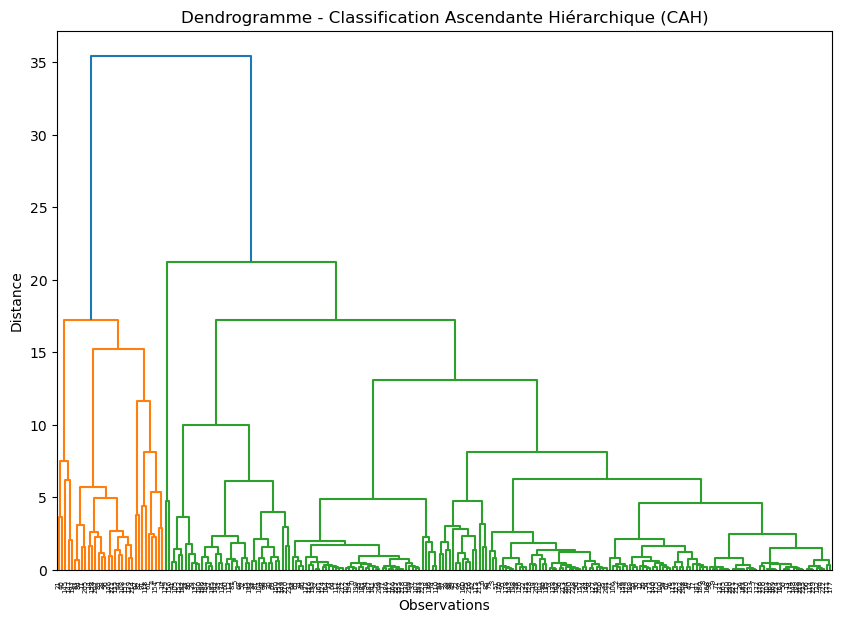

In [310]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaler_2, method="ward"))
plt.title("Dendrogramme - Classification Ascendante Hiérarchique (CAH)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 14-Application de la CAH et Attribution des Clusters CAH</h2>
</div>

In [320]:
cah = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster_labels_cah = cah.fit_predict(df_scaler_2)

df_fichierfinal["Cluster_CAH"] = cluster_labels_cah
print("Distribution des clusters CAH :")
print(df_fichierfinal["Cluster_CAH"].value_counts())

Distribution des clusters CAH :
Cluster_CAH
0    200
1     32
Name: count, dtype: int64


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 15-Réalisation d'une Analyse en Composantes Principales (ACP) ou (PCA)</h2>
</div>

In [69]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaler_2)
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["Cluster_CAH"] = df_fichierfinal["Cluster_CAH"].values
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.913789 -0.814582 -0.339743  0.637395 -0.104670  0.037457  0.004342   
1  4.849486 -1.240285 -0.198656  0.237040  0.180934  1.453480  0.093958   
2 -0.639364  0.570623  0.095126 -0.772909 -0.410818  0.370156  0.006739   
3 -0.392295 -0.819502  0.598236  0.270643  0.358407 -0.270738  0.015588   
4  6.197598  2.411574  0.617802  2.773476 -0.695325  1.138790 -0.029379   

        PC8  Cluster_CAH  
0 -0.005313            0  
1  0.054932            1  
2  0.009789            0  
3 -0.006089            0  
4  0.143076            1  


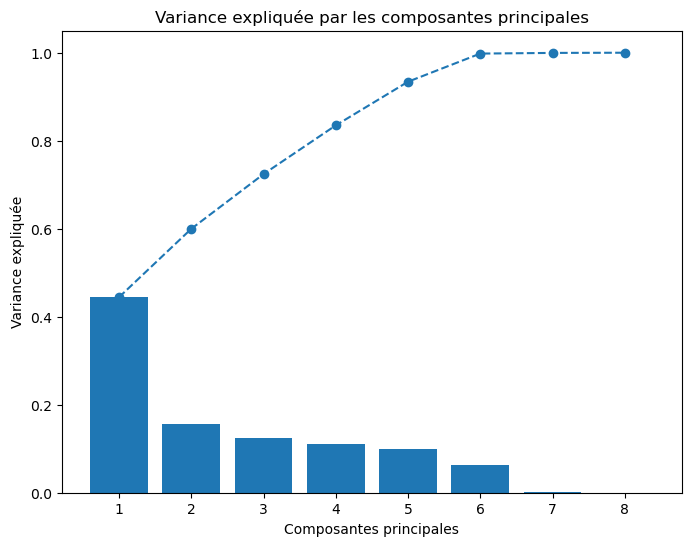

In [290]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.show()

In [291]:
coefficients = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=colonnes_numeriques)

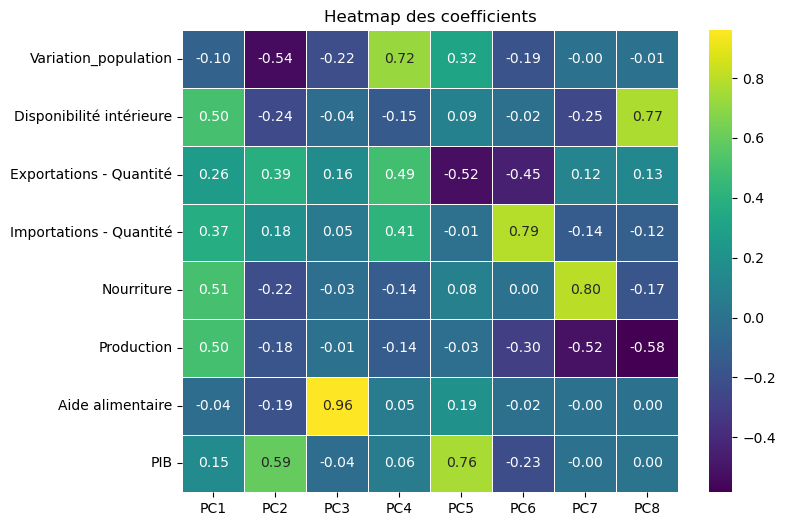

In [293]:
plt.figure(figsize=(8,6))
sns.heatmap(coefficients, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar=True)
plt.title("Heatmap des coefficients")
plt.show()

Analyser les correlations PC par rapport aux variables PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 16-Réalisation d'une Analyse en Composantes Principales (ACP) ou (PCA)</h2>
</div>

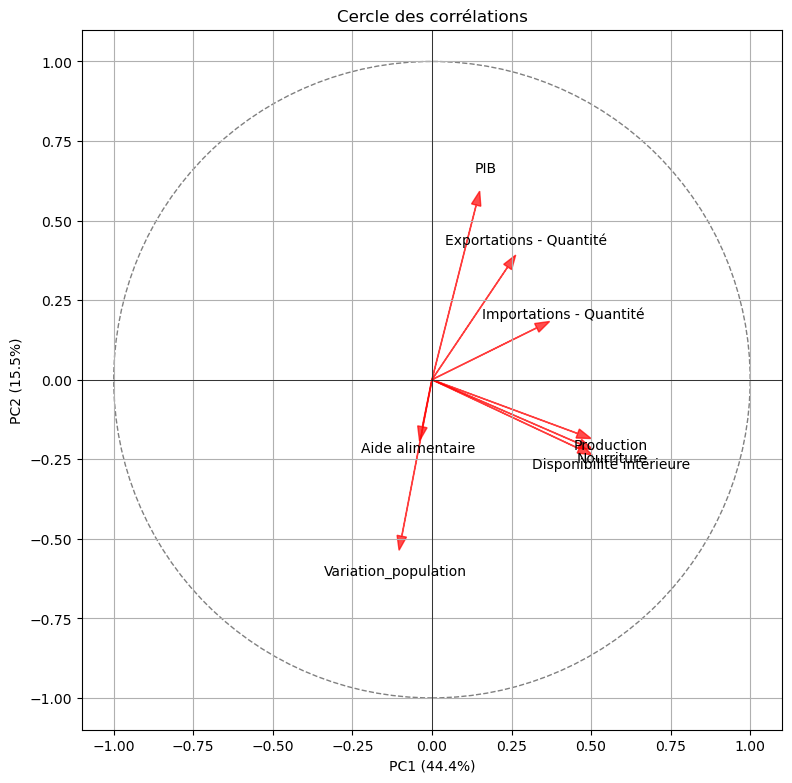

In [292]:
# Création de la figure
plt.figure(figsize=(8, 8))

# Cercle unité
cercle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(cercle)

# Ajout des flèches (vecteurs) pour chaque variable
for i, var in enumerate(colonnes_numeriques):
    x = pca.components_[0, i]
    y = pca.components_[1, i]
    
    # Flèche
    plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.03, length_includes_head=True)

    # Nom de la variable légèrement décalé
    plt.text(x * 1.12, y * 1.12, var, color='black', ha='center', va='center', fontsize=10)

# Axes avec pourcentage de variance expliquée
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

# Titre et limites
plt.title('Cercle des corrélations')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal')

# Affichage
plt.tight_layout()
plt.show()

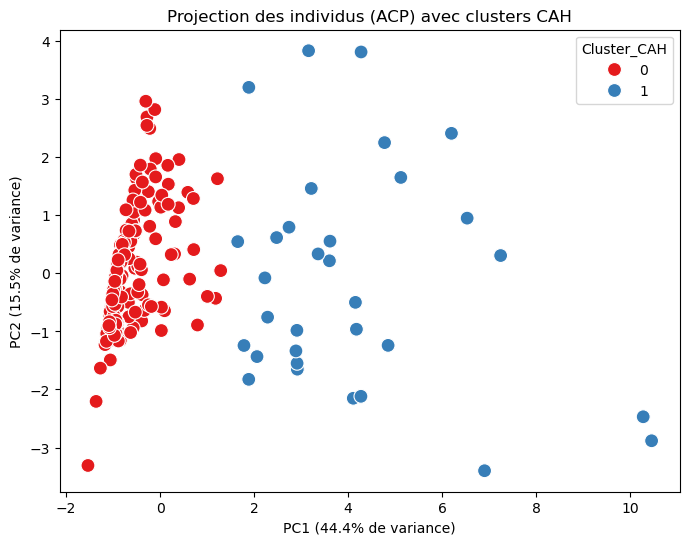

Variance expliquée par PC1 et PC2 : [4.44259021e-01 1.55456448e-01 1.24369299e-01 1.10802370e-01
 9.92240489e-02 6.39471880e-02 1.50655861e-03 4.35067211e-04]


In [299]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_CAH", palette="Set1", s=100)
plt.title("Projection des individus (ACP) avec clusters CAH")
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100,1)}% de variance)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100,1)}% de variance)")
plt.show()

print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)

préconisations de pays où d'étendre

In [326]:
moyennes_clusters = df_fichierfinal.groupby('Cluster_KM')[colonnes_numeriques].mean()
print("Moyennes des variables clés par cluster (KMeans) :")
moyennes_clusters.head()

Moyennes des variables clés par cluster (KMeans) :


Variation_population  Disponibilité intérieure  \
Cluster_KM                                                   
0                       0.873226              1.708548e+09   
1                       1.222786              8.592537e+07   

            Exportations - Quantité  Importations - Quantité    Nourriture  \
Cluster_KM                                                                   
0                      2.543226e+08             2.916129e+08  1.589161e+09   
1                      7.313433e+06             2.748259e+07  8.257214e+07   

              Production  Aide alimentaire           PIB  
Cluster_KM                                                
0           1.709258e+09        195.096774  30136.335484  
1           7.127363e+07       1352.965174  17489.362189

In [330]:
somme_clusters = moyennes_clusters.sum(axis=1)
print("Somme des moyennes des variables clés par cluster :")
print(somme_clusters)

cluster_fort_potentiel = somme_clusters.idxmax()
print(f"Le cluster présentant un fort potentiel est : {cluster_fort_potentiel}")

Somme des moyennes des variables clés par cluster :
Cluster_KM
0    5.552934e+09
1    2.745860e+08
dtype: float64
Le cluster présentant un fort potentiel est : 0


In [332]:
df_fichierfinal.reset_index(inplace=True)

In [334]:
pays_fort_potentiel = df_fichierfinal[df_fichierfinal["Cluster_KM"] == cluster_fort_potentiel]["Zone"].unique()
print("Pays à fort potentiel recommandés")
print(f"\nNous avons un nombre total de {len(pays_fort_potentiel)} pour les pays à fort potentiel, ci dessous la liste :")
for pays in pays_fort_potentiel:
    print(pays)

Pays à fort potentiel recommandés

Nous avons un nombre total de 31 pour les pays à fort potentiel, ci dessous la liste :
Afrique du Sud
Allemagne
Arabie saoudite
Argentine
Australie
Belgique
Canada
Chine - RAS de Hong-Kong
Colombie
Espagne
France
Fédération de Russie
Inde
Indonésie
Iran (République islamique d')
Italie
Japon
Malaisie
Mexique
Myanmar
Pakistan
Pays-Bas
Philippines
Pologne
Pérou
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Thaïlande
Turquie
Ukraine
Viet Nam
Égypte
